In [47]:
%matplotlib inline
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from string import punctuation
from sklearn.cross_validation import train_test_split, cross_val_score

from sklearn.naive_bayes import MultinomialNB
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import precision_score, confusion_matrix
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score



from __future__ import division
import gzip
import itertools
import string
import wordcloud
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import pylab as pl
import matplotlib.pyplot as plt
import itertools
import seaborn as sns
from textblob import TextBlob
from collections import Counter


In [9]:
Sports_Outdoors = pd.read_json('Sports_and_Outdoors_5.json', lines=True)

In [10]:
Sports_Outdoors.head()

,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime
0,1881509818,"[0, 0]",5,This came in on time and I am veru happy with ...,"01 26, 2014",AIXZKN4ACSKI,David Briner,Woks very good,1390694400
1,1881509818,"[1, 1]",5,I had a factory Glock tool that I was using fo...,"02 2, 2012",A1L5P841VIO02V,Jason A. Kramer,Works as well as the factory tool,1328140800
2,1881509818,"[2, 2]",4,If you don't have a 3/32 punch or would like t...,"02 28, 2012",AB2W04NI4OEAD,J. Fernald,"It's a punch, that's all.",1330387200
3,1881509818,"[0, 0]",4,This works no better than any 3/32 punch you w...,"02 5, 2012",A148SVSWKTJKU6,"Jusitn A. Watts ""Maverick9614""",It's a punch with a Glock logo.,1328400000
4,1881509818,"[0, 0]",4,I purchased this thinking maybe I need a speci...,"04 23, 2013",AAAWJ6LW9WMOO,Material Man,"Ok,tool does what a regular punch does.",1366675200


In [11]:
#cleaning data to lowercase
Sports_Outdoors['reviewText'] = Sports_Outdoors['reviewText'].str.lower()
Sports_Outdoors.head()

,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime
0,1881509818,"[0, 0]",5,this came in on time and i am veru happy with ...,"01 26, 2014",AIXZKN4ACSKI,David Briner,Woks very good,1390694400
1,1881509818,"[1, 1]",5,i had a factory glock tool that i was using fo...,"02 2, 2012",A1L5P841VIO02V,Jason A. Kramer,Works as well as the factory tool,1328140800
2,1881509818,"[2, 2]",4,if you don't have a 3/32 punch or would like t...,"02 28, 2012",AB2W04NI4OEAD,J. Fernald,"It's a punch, that's all.",1330387200
3,1881509818,"[0, 0]",4,this works no better than any 3/32 punch you w...,"02 5, 2012",A148SVSWKTJKU6,"Jusitn A. Watts ""Maverick9614""",It's a punch with a Glock logo.,1328400000
4,1881509818,"[0, 0]",4,i purchased this thinking maybe i need a speci...,"04 23, 2013",AAAWJ6LW9WMOO,Material Man,"Ok,tool does what a regular punch does.",1366675200


In [12]:
def remove_punctuations(text):
    for punct in punctuation:
        text = text.replace(punct, ' ')
    return text

In [13]:
# remove punctuation
Sports_Outdoors['reviewText'] = Sports_Outdoors['reviewText'].apply(remove_punctuations)

In [60]:
# remove stopwords
stop = stopwords.words('english')
Sports_Outdoors['reviewText'] = Sports_Outdoors['reviewText'].apply(lambda x: ' '.join([item for item in x.split() if item not in stop]))
Sports_Outdoors.head()

,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime
0,1881509818,"[0, 0]",5,"This came time I veru happy it, I haved used a...","01 26, 2014",AIXZKN4ACSKI,David Briner,Woks very good,1390694400
1,1881509818,"[1, 1]",5,"I factory Glock tool I using Glock 26, 27, 17....","02 2, 2012",A1L5P841VIO02V,Jason A. Kramer,Works as well as the factory tool,1328140800
2,1881509818,"[2, 2]",4,"If don't 3/32 punch would like one Glock bag, ...","02 28, 2012",AB2W04NI4OEAD,J. Fernald,"It's a punch, that's all.",1330387200
3,1881509818,"[0, 0]",4,This works better 3/32 punch would find hardwa...,"02 5, 2012",A148SVSWKTJKU6,"Jusitn A. Watts ""Maverick9614""",It's a punch with a Glock logo.,1328400000
4,1881509818,"[0, 0]",4,I purchased thinking maybe I need special tool...,"04 23, 2013",AAAWJ6LW9WMOO,Material Man,"Ok,tool does what a regular punch does.",1366675200


In [16]:
# creating a tokenized column for the reviewText
Sports_Outdoors['reviewText_tok'] = Sports_Outdoors['reviewText'].apply(word_tokenize)

## EDA

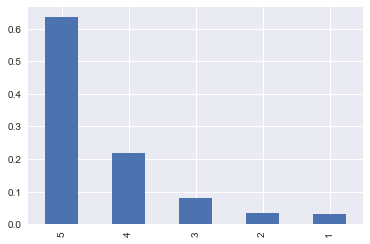

In [17]:
Sports_Outdoors['overall'].value_counts('1').plot(kind='Bar')

In [20]:
# creating a positive negative column where positive review (4-5) are 1 and negative reviews (1-3) are 0.
Sports_Outdoors['pos_neg'] = Sports_Outdoors['overall'].apply(lambda x: 1 if x > 3 else 0)
Sports_Outdoors["overall"] = Sports_Outdoors["overall"].apply(lambda x: '1' if x > 3 else '0')

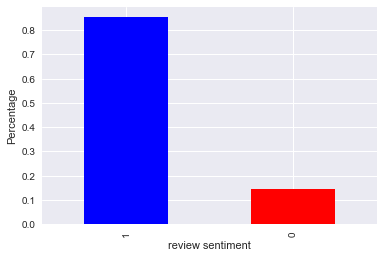

In [21]:
Sports_Outdoors['overall'].value_counts('1').plot(kind='Bar', color=['b','r'])
plt.xlabel('review sentiment')
plt.ylabel('Percentage')

In [22]:
products = Sports_Outdoors['overall'].groupby(Sports_Outdoors['asin']).count()
print ("Number of unique Products in the Sports and Outdoors Category = {}".format(products.count()))

Number of unique Products in the Sports and Outdoors Category = 18357


In [23]:
#Top 20 Products
sorted_products = products.sort_values(ascending=False)
print ("Top 20 Reviewed Products:\n")
print (sorted_products[:20])
print ("\nMost Reviewed Product, B001HBHNHE has {} reviews".format(products.max()))

Top 20 Reviewed Products:

asin
B001HBHNHE    1042
B001T7QJ9O     763
B000S5ODN2     647
B0010O748Q     513
B0000C50K3     427
B002ZYRV2E     401
B002OKWHVO     398
B000GCRWCG     393
B001HBHNHY     372
B0035L35A8     359
B004U8CP88     357
B001WJ577O     355
B004TNWD40     349
B006X9DLQM     344
B00178CS4K     343
B006QF3TW4     323
B003NFI092     309
B00200E0HM     307
B001949TKS     298
B000JZ7JM8     293
Name: overall, dtype: int64

Most Reviewed Product, B001HBHNHE has 1042 reviews


In [24]:
#Bottom 20 Products
sorted_products = products.sort_values(ascending=False)
print ("Bottom 20 Reviewed Products:\n")
print (sorted_products[18337:])
print ("\nMost Reviewed Product, B003Z6HUZE has {} reviews".format(products.min()))

Bottom 20 Reviewed Products:

asin
B003VN1U7K    5
B003VZIWZQ    5
B00BFXAIEY    5
B000T1VZCW    5
B000TH4MMG    5
B003XDWY32    5
B000T29STI    5
B003WXR992    5
B003WXJOEA    5
B000TAADTO    5
B00BGI7R38    5
B003WHHXAS    5
B000TTR0JG    5
B003WHA1N4    5
B000TRKTUK    5
B000TTHVYA    5
B003WGUEEG    5
B000TTM3OI    5
B003WDTI78    5
B003Z6HUZE    5
Name: overall, dtype: int64

Most Reviewed Product, B003Z6HUZE has 5 reviews


In [25]:
print("Number of overall reviews:", len(Sports_Outdoors.pos_neg))

('Number of overall reviews:', 296337)


In [26]:
print('Number of positive reviews: ', Sports_Outdoors.pos_neg.sum())
print('Percent of reviews: ', Sports_Outdoors.pos_neg.sum()/len(Sports_Outdoors.pos_neg)*100)

('Number of positive reviews: ', 253017)
('Percent of reviews: ', 85.38150821530893)


In [27]:
print('Number of negative reviews: ', 296337-253017)
print('Percent of reviews: ', 43320/len(Sports_Outdoors.pos_neg)*100)

('Number of negative reviews: ', 43320)
('Percent of reviews: ', 14.618491784691079)


In [28]:
print('Number of unique reviewers: ', len(set(Sports_Outdoors.reviewerID)))

('Number of unique reviewers: ', 35598)


In [29]:
length = []
for review in Sports_Outdoors.reviewText_tok:
    length.append(len(review))
print('Average Length of Reviews: ', np.mean(length))

('Average Length of Reviews: ', 44.456190080887637)


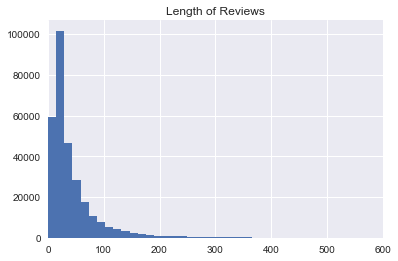

In [30]:
plt.hist(length, bins=200);
plt.xlim((0,600))
plt.title('Length of Reviews')

In [31]:
pos_reviews = Sports_Outdoors[Sports_Outdoors.pos_neg == 1]

In [32]:
pos_length = []
for review in pos_reviews.reviewText_tok:
    pos_length.append(len(review))
print('Average Length of Positive Reviews: ', np.mean(pos_length))

('Average Length of Positive Reviews: ', 43.419758356157885)


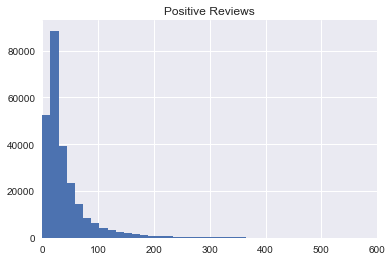

In [33]:
plt.hist(pos_length, bins=200);
plt.xlim((0,600))
plt.title('Positive Reviews')

In [34]:
neg_reviews = Sports_Outdoors[Sports_Outdoors.pos_neg == 0]
neg_length = []
for review in neg_reviews.reviewText_tok:
    neg_length.append(len(review))
print('Average Length of Negative Reviews: ', np.mean(length))

('Average Length of Negative Reviews: ', 44.456190080887637)


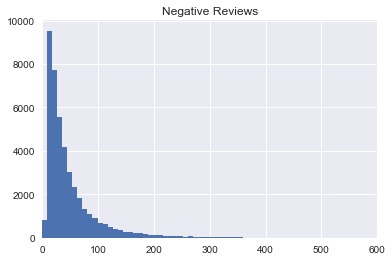

In [35]:
plt.hist(neg_length, bins=200);
plt.xlim((0,600))
plt.title('Negative Reviews')

In [37]:
Sports_Outdoors['reviewText'][:11]

0     came time veru happy haved used already makes ...
1     factory glock tool using glock 26 27 17 since ...
2     3 32 punch would like one glock bag okay butt ...
3     works better 3 32 punch would find hardware st...
4     purchased thinking maybe need special tool eas...
5     needed tool really break g22 works perfectly d...
6            u get need completely take glock model gen
7     light doubt capture attention night time drive...
8     light laser torch work well bright installed t...
9     everything says would like 34 lane 34 markings...
10    bright would recommend lite anyone put one wif...
Name: reviewText, dtype: object

In [38]:
reviews = Sports_Outdoors['reviewText']

In [39]:
stops = stopwords.words('english')

In [40]:
def tokenize(text):
    tokenized = word_tokenize(text)
    no_punc = []
    for review in tokenized:
        line = "".join(char for char in review if char not in string.punctuation)
        no_punc.append(line)
    tokens = lemmatize(no_punc)
    return tokens


def lemmatize(tokens):
    lmtzr = WordNetLemmatizer()
    lemma = [lmtzr.lemmatize(t) for t in tokens]
    return lemma

In [41]:
reviews = reviews.apply(lambda x: tokenize(x))

In [42]:
reviews[:11]

0     [came, time, veru, happy, haved, used, already...
1     [factory, glock, tool, using, glock, 26, 27, 1...
2     [3, 32, punch, would, like, one, glock, bag, o...
3     [work, better, 3, 32, punch, would, find, hard...
4     [purchased, thinking, maybe, need, special, to...
5     [needed, tool, really, break, g22, work, perfe...
6     [u, get, need, completely, take, glock, model,...
7     [light, doubt, capture, attention, night, time...
8     [light, laser, torch, work, well, bright, inst...
9     [everything, say, would, like, 34, lane, 34, m...
10    [bright, would, recommend, lite, anyone, put, ...
Name: reviewText, dtype: object

In [44]:
cloud = wordcloud.WordCloud(background_color='black', max_font_size=60, 
                                relative_scaling=1).generate(' '.join(Sports_Outdoors.reviewText))

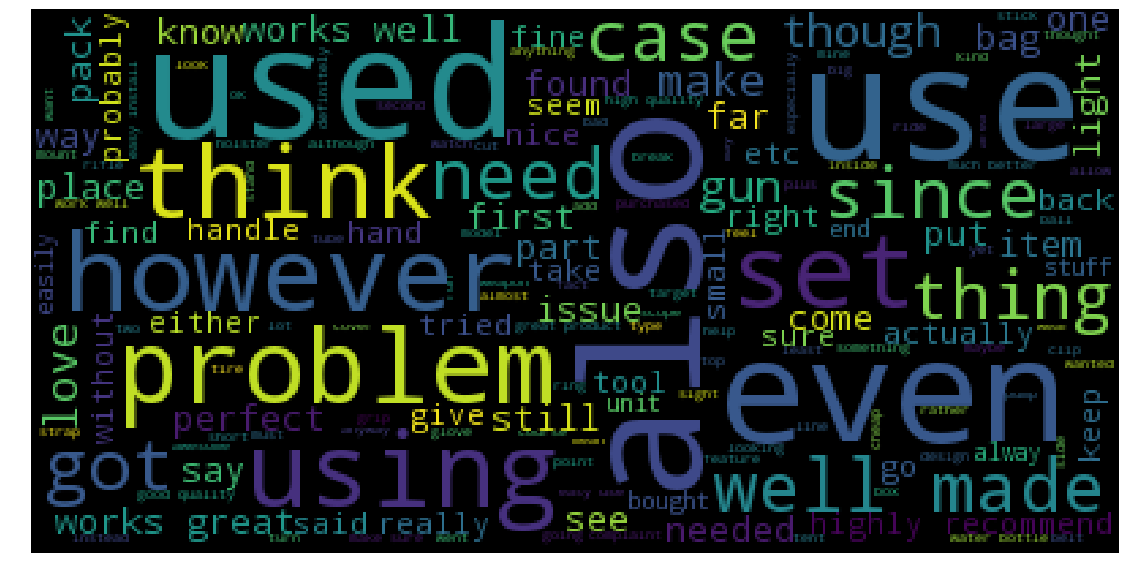

In [45]:
fig = plt.figure(figsize=(20, 10))
plt.axis('off')
plt.imshow(cloud);

In [48]:
nltk.download('punkt')
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk import FreqDist
from nltk.tokenize import RegexpTokenizer

[nltk_data] Downloading package punkt to C:\Users\Danny
[nltk_data]     Arenson\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [49]:
stop = stopwords.words('english')
lemmatizer = WordNetLemmatizer()

In [51]:
tokens = Sports_Outdoors["summary"].apply(nltk.word_tokenize)

In [52]:
tokens.head()

0                                   [Woks, very, good]
1            [Works, as, well, as, the, factory, tool]
2              [It, 's, a, punch, ,, that, 's, all, .]
3          [It, 's, a, punch, with, a, Glock, logo, .]
4    [Ok, ,, tool, does, what, a, regular, punch, d...
Name: summary, dtype: object

In [54]:
from __future__ import print_function
import string
from string import maketrans

In [55]:
lemmatizer = nltk.WordNetLemmatizer()
stop = stopwords.words('english')
translation = string.maketrans(string.punctuation,' '*len(string.punctuation))
def preprocess (eachline):
    sentence = eachline.lower()
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(sentence)
    stop_words = (w for w in tokens if not w in stop)
    clean_words =(w for w in stop_words if not w.isnumeric())
    stemmed = [w for w in clean_words if lemmatizer.lemmatize(w)] 
    return ' '.join(stemmed)

In [56]:
cleaned_reviews = []
for w in Sports_Outdoors['summary']:
    cleaned_reviews.append(preprocess(w))

In [57]:
cleaned_reviews

[u'woks good',
 u'works well factory tool',
 u'punch',
 u'punch glock logo',
 u'ok tool regular punch',
 u'glock punch tool needed glock applications',
 u'great tool',
 u'bright',
 u'seen',
 u'bicycle rear tail light',
 u'great lite',
 u'worth price charge',
 u'bargain',
 u'bulky',
 u'love',
 u'bulky',
 u'rear bike light',
 u'needed little modification',
 u'good light price laser iight cool factor',
 u'resistance good quality',
 u'girlfriend loves',
 u'opposed resistance',
 u'bought purple one',
 u'good resistance band',
 u'great device',
 u'great product even greater company',
 u'excellent product',
 u'gym bag',
 u'great set',
 u'love',
 u'versatile',
 u'short',
 u'super',
 u'lovin',
 u'excellent bands',
 u'quick easy economical',
 u'works great travel cheapest way workout home',
 u'high quality bands',
 u'perfect',
 u'broke extrememly fast inconvenient',
 u'resistance bands',
 u'work great',
 u'band discoloration',
 u'quality product quality workout cheap',
 u'useful',
 u'wow',
 u'go

## Textblob

In [58]:
# read the entire file into a python array
with open('Sports_and_Outdoors_5.json', 'rb') as f:
    reviews = f.readlines()

data = [line.decode('utf-8') for line in reviews]
# remove the trailing "\n" from each line
data_clean = map(lambda x: x.rstrip(), data)

data_json_str = "[" + ','.join(data_clean) + "]"

# now, load it into pandas
Sports_Outdoors = pd.read_json((data_json_str))

In [61]:
grouped = Sports_Outdoors['reviewText'].groupby(Sports_Outdoors['asin']).sum()
print(len(grouped))
grouped.head()

18357


asin
1881509818    This came time I veru happy it, I haved used a...
2094869245    This light doubt capture attention night-time ...
7245456259    So worked well couple weeks, lunge workout, sn...
7245456313    These bands claimed sizex good 5'7 inch 145 pd...
B000002NUS    I bought Walmart price Amazon. On first use, c...
Name: reviewText, dtype: object

In [62]:
first = grouped[grouped.index[0]]

In [63]:
# x must be an asin number from the grouped series
def product_sentiment(x):
    reviews = TextBlob(grouped[str(x)])
    return reviews.sentiment.polarity

In [64]:
product_sentiment(7245456259)

0.2639930555555555

In [65]:
sentiments = []
for x in grouped.index:
    sentiments.append(product_sentiment(x))

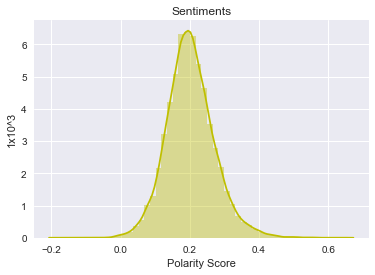

In [66]:
plot = sns.distplot(sentiments, color='y');
plot.set(xlabel='Polarity Score', ylabel='1x10^3')
plt.title('Sentiments')
plt.show()

In [67]:
np.mean(sentiments)

0.20201951395492149

In [68]:
sort_sentiments_neg = sorted(sentiments)
sort_sentiments_neg[:5]

[-0.17878787878787875,
 -0.1143939393939394,
 -0.046568627450980386,
 -0.037255602496566384,
 -0.035192147034252295]

In [69]:
sort_sentiments_pos = sorted(sentiments, reverse=True)
sort_sentiments_pos[:5]

[0.6448717948717948,
 0.6000000000000001,
 0.567,
 0.5547202797202797,
 0.5540343915343915]

In [70]:
def product_num(x):
    return grouped.index[sentiments.index(x)]

### Most Negative

In [71]:
sentiments

[0.2804029304029304,
 0.28491830065359475,
 0.2639930555555555,
 0.23882643787524263,
 0.15316961076306868,
 0.1511040022069434,
 0.16199494949494944,
 0.212502639636786,
 0.06650013451708366,
 0.16716983265490726,
 0.30172101449275357,
 0.153871370175718,
 0.14280961791831356,
 0.16637931034482759,
 0.264305740987984,
 0.2021759259259259,
 0.2300400979642051,
 0.23715876349143336,
 0.07097560975609757,
 0.11516025641025639,
 0.17458791208791213,
 0.2931752993595099,
 0.1746031746031746,
 0.08481763511402686,
 0.1206519431861898,
 0.12134157509157512,
 0.203729827005689,
 0.2535737734487734,
 0.17077343816314397,
 0.17826721763085396,
 0.1898137480798771,
 0.19563900560224093,
 0.20208535651966314,
 -0.009992784992785001,
 0.22552931387608807,
 0.154932719985076,
 0.1504861663561878,
 0.16382713371398724,
 0.19722733563590034,
 0.23248788638262327,
 0.13983891804297527,
 0.2092245542717241,
 0.2634353741496598,
 0.17576530612244895,
 0.2995325118351434,
 0.23254252533537279,
 0.1484506

### Most Positive

In [73]:
product_num(0.6448717948717948)

u'B0036N2UMY'

### Positive Reviews Sentiment Polarity Text Blob

In [75]:
grouped_pos = pos_reviews['reviewText'].groupby(pos_reviews['asin']).sum()
print(len(grouped_pos))
grouped_pos.head()

18347


asin
1881509818    came time veru happy haved used already makes ...
2094869245    light doubt capture attention night time drive...
7245456259    girlfriend disabled cant high impact workouts ...
7245456313    bands claimed sizex good 5 7 inch 145 pder lov...
B000002NUS    bought two sons kits attachments needed clean ...
Name: reviewText, dtype: object

In [76]:
sentiments_pos = []
for x in grouped_pos.index:
    sentiments_pos.append(product_sentiment(x))

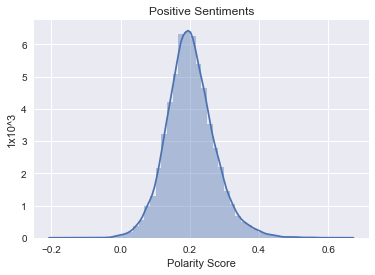

In [77]:
plot = sns.distplot(sentiments_pos);
plot.set(xlabel='Polarity Score', ylabel='1x10^3')
plt.title('Positive Sentiments')
plt.show()

In [78]:
np.mean(sentiments_pos)

0.2020932177119438

In [79]:
grouped_neg = neg_reviews['reviewText'].groupby(neg_reviews['asin']).sum()
print(len(grouped_neg))
grouped_neg.head()

13229


asin
2094869245    cheaply made supposed wish usb rechargeable th...
7245456259    worked well couple weeks lunge workout snapped...
7245456313    several different bands least likable stretch ...
B000002NUS    bought walmart price amazon first use cleaning...
B00000J6JO    main benefit putting mat ball return works wel...
Name: reviewText, dtype: object

In [80]:
sentiments_neg = []
for x in grouped_neg.index:
    sentiments_neg.append(product_sentiment(x))

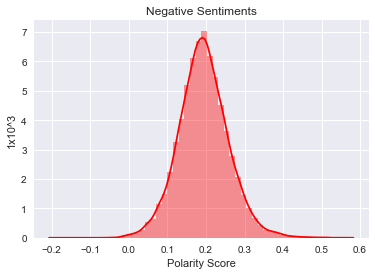

In [81]:
plot = sns.distplot(sentiments_neg, color='r');
plot.set(xlabel='Polarity Score', ylabel='1x10^3')
plt.title('Negative Sentiments')
plt.show()

In [82]:
np.mean(sentiments_neg)

0.19354483949900808

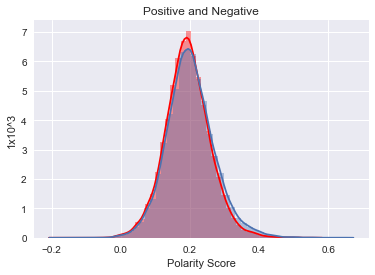

In [83]:
# Negative(red)
plot = sns.distplot(sentiments_neg, color='r');
plot.set(xlabel='Polarity Score', ylabel='1x10^3')
# Positive(blue)
plot = sns.distplot(sentiments_pos);
plot.set(xlabel='Polarity Score', ylabel='1x10^3')
plt.title('Positive and Negative')

In [84]:
np.mean(sentiments_neg), np.mean(sentiments_pos)

(0.19354483949900808, 0.2020932177119438)